## V3 Dataset


V3 dataset is the V3 dataset with small differences:

- Only processing basaleline N0500 + 
- Remove outlier such as Unconsolidated products

In [106]:
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from PIL import Image
import natsort


In [107]:
def validate_data_alignment(df_l1c, df_l2a):
    """Validate that the data is properly aligned"""
    mismatches = 0
    for i in range(min(len(df_l1c), len(df_l2a))):
        if df_l1c['id_key'][i] != df_l2a['id_key'][i]:
            print(f"Mismatch: {df_l1c['id_key'][i]} != {df_l2a['id_key'][i]}")
            mismatches += 1

    if mismatches == 0:
        print(f"All {len(df_l1c)} records are properly aligned")
    else:
        print(f"Found {mismatches} mismatches in data alignment")

In [108]:
def prepare_paths(path_dir):

    df_input = pd.read_csv(f"{path_dir}/input.csv")
    df_output = pd.read_csv(f"{path_dir}/target.csv")

    df_input["path"] = df_input["Name"].apply(lambda x: os.path.join(path_dir, "input", os.path.basename(x).replace(".SAFE","")))
    df_output["path"] = df_output["Name"].apply(lambda x: os.path.join(path_dir, "target", os.path.basename(x).replace(".SAFE","")))

    return df_input, df_output

In [224]:
version = "V3"
TRAIN_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/train/"
VAL_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/val/"
TEST_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/test/"
df_train_input, df_train_output =  prepare_paths(TRAIN_DIR)
df_val_input, df_val_output =  prepare_paths(VAL_DIR)
df_test_input, df_test_output =  prepare_paths(TEST_DIR)

In [110]:
df_test_input, df_test_output =  prepare_paths(TEST_DIR)
df_test_input['processing_baseline'] = df_test_input['id_key'].str.extract(r'N(\d{4})')[0].astype(int)
df_test_input = df_test_input[df_test_input['processing_baseline'] >= 500]
df_test_output['processing_baseline'] = df_test_output['id_key'].str.extract(r'N(\d{4})')[0].astype(int)
df_test_output = df_test_output[df_test_output['processing_baseline'] >= 500]
df_test_input = df_test_input.reset_index(drop=True)
df_test_output = df_test_output.reset_index(drop=True)

Difference > 10% at index 75: 10025.13% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20190308T102021_N0500_R065_T32TNT_20221111T224128/T32TNT_20190308T102021_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20190308T102021_N0500_R065_T32TNT_20221111T224128/T32TNT_20190308T102021_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20190308T102021_N0500_R065_T32TNT_20221111T224128/T32TNT_20190308T102021_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20190308T102021_N0500_R065_T32TNT_20221123T222853/T32TNT_20190308T102021_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20190308T102021_N0500_R065_T32TNT_20221123T222853/T32TNT_20190308T102021_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20190308T102021_N0500_R065_T32TNT_20221123T222853/T32TNT_20190308T102021_B04_10m.png']


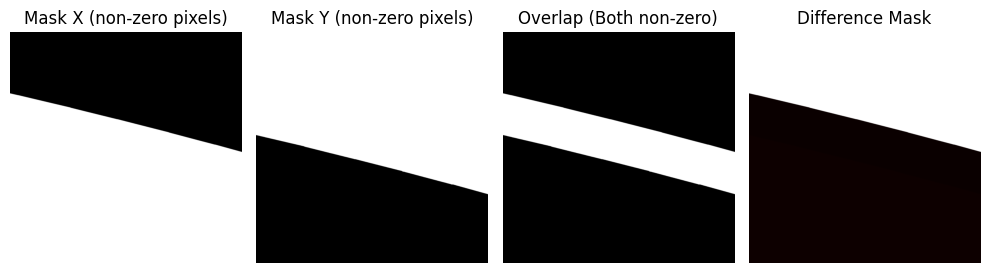

Difference > 10% at index 156: 14103.59% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20200613T103031_N0500_R108_T32UNA_20230614T210728/T32UNA_20200613T103031_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20200613T103031_N0500_R108_T32UNA_20230614T210728/T32UNA_20200613T103031_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2A_MSIL1C_20200613T103031_N0500_R108_T32UNA_20230614T210728/T32UNA_20200613T103031_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20200613T103031_N0500_R108_T32UNA_20230416T172456/T32UNA_20200613T103031_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20200613T103031_N0500_R108_T32UNA_20230416T172456/T32UNA_20200613T103031_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2A_MSIL2A_20200613T103031_N0500_R108_T32UNA_20230416T172456/T32UNA_20200613T103031_B04_10m.png']


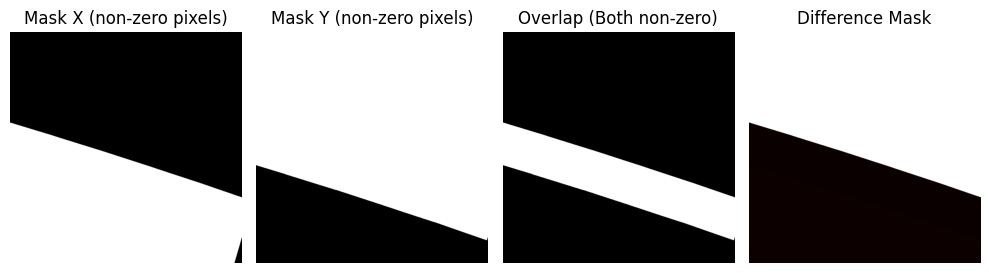

Difference > 10% at index 173: 1972.37% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20200817T102559_N0500_R108_T31TFN_20230423T190131/T31TFN_20200817T102559_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20200817T102559_N0500_R108_T31TFN_20230423T190131/T31TFN_20200817T102559_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20200817T102559_N0500_R108_T31TFN_20230423T190131/T31TFN_20200817T102559_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20200817T102559_N0500_R108_T31TFN_20230420T222228/T31TFN_20200817T102559_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20200817T102559_N0500_R108_T31TFN_20230420T222228/T31TFN_20200817T102559_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20200817T102559_N0500_R108_T31TFN_20230420T222228/T31TFN_20200817T102559_B04_10m.png']


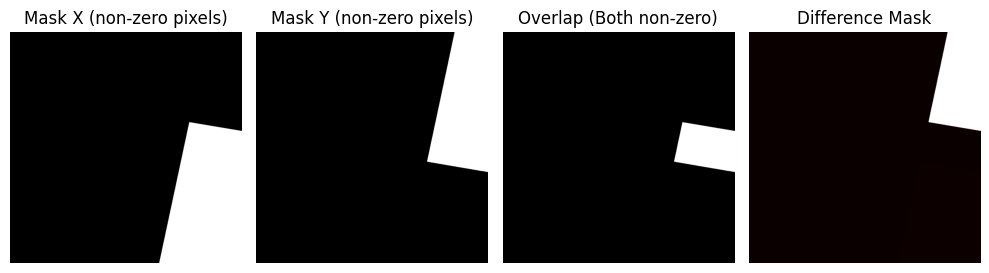

Difference > 10% at index 492: 98.33% different
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20240810T100559_N0511_R022_T32TPS_20240810T124659/T32TPS_20240810T100559_B02.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20240810T100559_N0511_R022_T32TPS_20240810T124659/T32TPS_20240810T100559_B03.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/input/S2B_MSIL1C_20240810T100559_N0511_R022_T32TPS_20240810T124659/T32TPS_20240810T100559_B04.png']
['/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20240810T100559_N0511_R022_T32TPS_20240810T132043/T32TPS_20240810T100559_B02_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20240810T100559_N0511_R022_T32TPS_20240810T132043/T32TPS_20240810T100559_B03_10m.png', '/mnt/disk/dataset/sentinel-ai-processor/V2/test/target/S2B_MSIL2A_20240810T100559_N0511_R022_T32TPS_20240810T132043/T32TPS_20240810T100559_B04_10m.png']


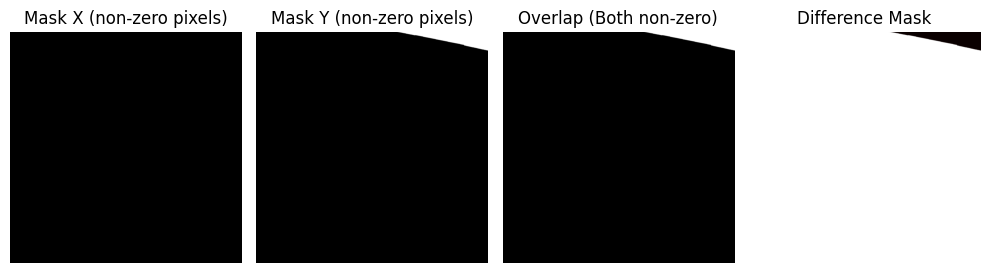

In [112]:
import os
import glob
import cv2
import natsort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List to store paths where difference > 10%
diff_exceeds =  []
mismatch_indices = []

for index in range(len(df_test_input)):
    input_path = df_test_input['path'][index]
    output_path = df_test_output['path'][index]
    x_paths = natsort.natsorted(glob.glob(os.path.join(input_path, "*.png"), recursive=False))
    y_paths = natsort.natsorted(glob.glob(os.path.join(output_path, "*.png"), recursive=False))

    x_data = cv2.imread(x_paths[0])
    y_data = cv2.imread(y_paths[0])

    mask_x = np.any(x_data != 0, axis=2).astype(np.uint8)
    mask_y = np.any(y_data != 0, axis=2).astype(np.uint8)

    diff_mask = np.abs(mask_x - mask_y)
    diff_ratio = np.sum(diff_mask) / diff_mask.size

    if diff_ratio > 0.5:
        mismatch_indices.append(index)
        print(f"Difference > 10% at index {index}: {diff_ratio:.2%} different")
        print(x_paths)
        print(y_paths)
        # Save paths
        diff_exceeds.append({
            'input_path': input_path,
            'output_path': output_path,
            'diff_ratio': diff_ratio
        })
        # Optional: Plot masks (same as before)
        overlap_mask = np.logical_and(mask_x, mask_y).astype(np.uint8)
        fig, axs = plt.subplots(1, 4, figsize=(10, 4))

        axs[0].imshow(mask_x, cmap='gray')
        axs[0].set_title('Mask X (non-zero pixels)')
        axs[0].axis('off')

        axs[1].imshow(mask_y, cmap='gray')
        axs[1].set_title('Mask Y (non-zero pixels)')
        axs[1].axis('off')

        axs[2].imshow(overlap_mask, cmap='gray')
        axs[2].set_title('Overlap (Both non-zero)')
        axs[2].axis('off')

        axs[3].imshow(diff_mask, cmap='hot')
        axs[3].set_title('Difference Mask')
        axs[3].axis('off')

        plt.tight_layout()
        plt.show()
        plt.close()

# Create DataFrame of mismatched paths
df_diff = pd.DataFrame(diff_exceeds)

In [69]:
# Remove rows at mismatch indices
df_test_input = df_test_input.drop(index=mismatch_indices).reset_index(drop=True)
df_test_output = df_test_output.drop(index=mismatch_indices).reset_index(drop=True)

In [70]:
print(len(df_test_output), len(df_test_input))

530 530


In [ ]:
import os
import glob
import cv2
import natsort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def clean_dataset(df_input, df_output, processing_baseline=500, diff_threshold=0.5, show_plots=True):
    """
    Filters out rows from df_input and df_output where the non-zero mask difference ratio exceeds a threshold.

    Parameters:
        df_input (pd.DataFrame): Input DataFrame with 'id_key' and 'path' columns.
        df_output (pd.DataFrame): Output DataFrame with 'id_key' and 'path' columns.
        diff_threshold (float): Threshold for the difference ratio (default 0.5).
        show_plots (bool): Whether to display difference plots (default True).

    Returns:
        df_input_clean (pd.DataFrame): Filtered input DataFrame.
        df_output_clean (pd.DataFrame): Filtered output DataFrame.
        df_diff (pd.DataFrame): DataFrame of mismatched paths and difference ratios.
    """
    # Add processing_baseline column and filter both DataFrames
    for df in [df_input, df_output]:
        df['processing_baseline'] = df['id_key'].str.extract(r'N(\d{4})')[0].astype(int)
    
    df_input = df_input[df_input['processing_baseline'] >= processing_baseline].reset_index(drop=True)
    df_output = df_output[df_output['processing_baseline'] >= processing_baseline].reset_index(drop=True)

    # List to store mismatches and their indices
    diff_exceeds = []
    mismatch_indices = []

    for index in range(len(df_input)):
        input_path = df_input['path'][index]
        output_path = df_output['path'][index]

        x_paths = natsort.natsorted(glob.glob(os.path.join(input_path, "*.png")))
        y_paths = natsort.natsorted(glob.glob(os.path.join(output_path, "*.png")))

        x_data = cv2.imread(x_paths[0])
        y_data = cv2.imread(y_paths[0])

        mask_x = np.any(x_data != 0, axis=2).astype(np.uint8)
        mask_y = np.any(y_data != 0, axis=2).astype(np.uint8)

        diff_mask = np.abs(mask_x - mask_y)
        diff_ratio = np.sum(diff_mask) / diff_mask.size

        if diff_ratio > diff_threshold:
            mismatch_indices.append(index)
            diff_exceeds.append({
                'index': index,
                'input_path': input_path,
                'output_path': output_path,
                'diff_ratio': diff_ratio
            })

            if show_plots:
                print(f"Difference > {diff_threshold*100:.0f}% at index {index}: {diff_ratio:.2%} different")
                print(x_paths)
                print(y_paths)

                overlap_mask = np.logical_and(mask_x, mask_y).astype(np.uint8)
                fig, axs = plt.subplots(1, 4, figsize=(10, 4))

                axs[0].imshow(mask_x, cmap='gray')
                axs[0].set_title('Mask X')
                axs[0].axis('off')

                axs[1].imshow(mask_y, cmap='gray')
                axs[1].set_title('Mask Y')
                axs[1].axis('off')

                axs[2].imshow(overlap_mask, cmap='gray')
                axs[2].set_title('Overlap')
                axs[2].axis('off')

                axs[3].imshow(diff_mask, cmap='hot')
                axs[3].set_title('Difference')
                axs[3].axis('off')

                plt.tight_layout()
                plt.show()
                plt.close()

    # Drop mismatched rows
    df_input_clean = df_input.drop(index=mismatch_indices).reset_index(drop=True)
    df_output_clean = df_output.drop(index=mismatch_indices).reset_index(drop=True)
    df_diff = pd.DataFrame(diff_exceeds)

    return df_input_clean, df_output_clean, df_diff


In [ ]:
version = "V3"
TRAIN_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/train/"
VAL_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/val/"
TEST_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{version}/test/"
df_train_input, df_train_output =  prepare_paths(TRAIN_DIR)
df_val_input, df_val_output =  prepare_paths(VAL_DIR)
df_test_input, df_test_output =  prepare_paths(TEST_DIR)

In [114]:
df_test_input_clean, df_test_output_clean, df_diff_test = clean_dataset(df_test_input, df_test_output, processing_baseline=500, diff_threshold=0.5, show_plots=False)
print(len(df_test_input_clean), len(df_test_output_clean))

530 530


In [115]:
df_val_input_clean, df_val_output_clean, df_diff_val = clean_dataset(df_val_input, df_val_output, processing_baseline=500, diff_threshold=0.5, show_plots=False)
print(len(df_val_input_clean), len(df_val_output_clean))

516 516


In [116]:
df_train_input_clean, df_train_output_clean, df_diff_train = clean_dataset(df_train_input, df_train_output, processing_baseline=500, diff_threshold=0.5, show_plots=False)
print(len(df_train_input_clean), len(df_train_output_clean))

4227 4227


## Save new csv files in V3

In [ ]:
new_version = "V3"
base_dir = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/"
TRAIN_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/train/"
VAL_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/val/"
TEST_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/test/"

# Save the sampled data to the corresponding directories
df_train_input_clean.to_csv(os.path.join(base_dir, 'train/input.csv'), index=False)
df_train_output_clean.to_csv(os.path.join(base_dir, 'train/target.csv'), index=False)

df_val_input_clean.to_csv(os.path.join(base_dir, 'val/input.csv'), index=False)
df_val_output_clean.to_csv(os.path.join(base_dir, 'val/target.csv'), index=False)

df_test_input_clean.to_csv(os.path.join(base_dir, 'test/input.csv'), index=False)
df_test_output_clean.to_csv(os.path.join(base_dir, 'test/target.csv'), index=False)

In [228]:
import os
new_version = "V3"
base_dir = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/"
TRAIN_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/train/"
VAL_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/val/"
TEST_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/test/"
# Define test directory
# List validation files with full paths
val_input = natsort.natsorted([os.path.join(VAL_DIR, "input", fname) for fname in os.listdir(os.path.join(VAL_DIR, "input"))])
val_target = natsort.natsorted([os.path.join(VAL_DIR, "target", fname) for fname in os.listdir(os.path.join(VAL_DIR, "target"))])

In [230]:
clean_val_input = pd.read_csv(os.path.join(base_dir, 'val/input.csv'))
clean_val_target = pd.read_csv(os.path.join(base_dir, 'val/target.csv'))

In [ ]:
clean_val_target['path'] = clean_val_target['path'].apply(lambda x: x.replace("/V2/", "/V3/"))
set_val_target = set(val_target)
set_df_val_output = set(clean_val_target['path'])

# Find the difference: items in val_target but not in df_val_output_clean
difference = set_val_target - set_df_val_output

In [258]:
import os
import pandas as pd
import natsort

# Define the new version and directories
new_version = "V3"
base_dir = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/"
TRAIN_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/train/"
VAL_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/val/"
TEST_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{new_version}/test/"

# List validation files with full paths
val_input = natsort.natsorted([os.path.join(TRAIN_DIR, "input", fname) for fname in os.listdir(os.path.join(TRAIN_DIR, "input"))])
val_target = natsort.natsorted([os.path.join(TRAIN_DIR, "target", fname) for fname in os.listdir(os.path.join(TRAIN_DIR, "target"))])

# Read cleaned validation data
clean_val_input = pd.read_csv(os.path.join(base_dir, 'train/input.csv'))
clean_val_target = pd.read_csv(os.path.join(base_dir, 'train/target.csv'))

# Apply the replacement from V2 to V3 in the 'path' column of clean_val_target
clean_val_target['path'] = clean_val_target['path'].apply(lambda x: x.replace("/V2/", "/V3/"))

# Convert both lists to sets for efficient comparison
set_val_target = set(val_target)
set_df_val_output = set(clean_val_target['path'])

# Find the difference: items in val_target but not in clean_val_target['path']
difference = set_val_target - set_df_val_output

# Output the result (difference)
print(len(difference), "files in val_target but not in clean_val_target['path']")


573 files in val_target but not in clean_val_target['path']


In [259]:
len(set_df_val_output)

4227

In [260]:
import shutil

# Deleting directories that are in the difference list
for dir_path in difference:
    try:
        if os.path.isdir(dir_path):
            print(f"Deleting directory: {dir_path}")
            shutil.rmtree(dir_path)  # Remove the directory and all its contents
        else:
            print(f"Path is not a directory: {dir_path}")
    except Exception as e:
        print(f"Error deleting directory {dir_path}: {e}")

Deleting directory: /mnt/disk/dataset/sentinel-ai-processor/V3/train/target/S2A_MSIL2A_20220421T101601_N0400_R065_T32TNT_20220421T134744
Deleting directory: /mnt/disk/dataset/sentinel-ai-processor/V3/train/target/S2B_MSIL2A_20220102T104339_N0301_R008_T31UFR_20220102T122433
Deleting directory: /mnt/disk/dataset/sentinel-ai-processor/V3/train/target/S2B_MSIL2A_20220529T102559_N0400_R108_T31TGM_20220529T134240
Deleting directory: /mnt/disk/dataset/sentinel-ai-processor/V3/train/target/S2A_MSIL2A_20220623T103031_N0400_R108_T31UGP_20220623T170319
Deleting directory: /mnt/disk/dataset/sentinel-ai-processor/V3/train/target/S2A_MSIL2A_20220911T102621_N0400_R108_T32TMT_20220911T165754
Deleting directory: /mnt/disk/dataset/sentinel-ai-processor/V3/train/target/S2B_MSIL2A_20220605T101559_N0400_R065_T32TPS_20220605T134213
Deleting directory: /mnt/disk/dataset/sentinel-ai-processor/V3/train/target/S2B_MSIL2A_20220105T105339_N0301_R051_T31UFR_20220105T134509
Deleting directory: /mnt/disk/dataset/sen